In [46]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

# read data from train.csv 
rawdata = pd.read_csv("train.csv")
rawtestdata = pd.read_csv("test.csv")


In [47]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [48]:
rawdata.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [49]:
selected_cols = [ 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked','Survived']
selected_rawdata = rawdata[selected_cols]
selected_rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
 7   Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


## Note: 
+ Nan: Age, Embarked
+ target: Survived 
+ numerical: Age, Pclass, Sib Sp, Parch, Fare
+ category: Sex, Embarked

C:\Users\Phan Trong Dai\AppData\Local\Temp\ipykernel_9844\1495955901.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_age= selected_rawdata_copy.groupby(['Agegroup', 'Survived']).size().unstack(fill_value=0)


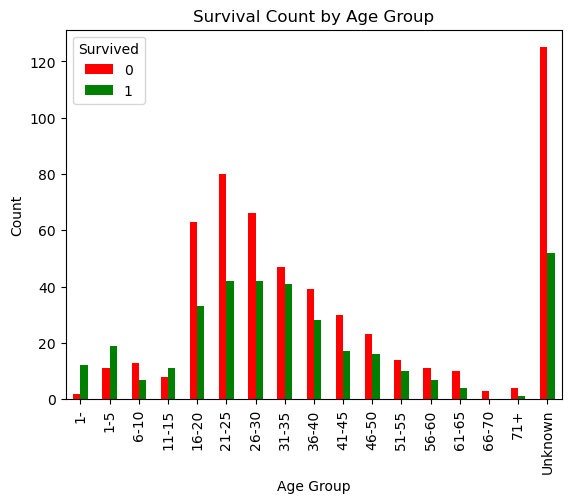

In [50]:
# for the age, instead of fill it with mean, ill use category it into many cols
# first let plot the age distribution
selected_rawdata_copy = selected_rawdata.copy()
# bins = [float('-inf'),1, 10, 20, 30,40,50,60,70, float('inf')]
bins = [float('-inf'),1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, float('inf')]
# labels = ['1-', '1-10', '11-20','21-30','31-40','41-50', '51-60','61-70','71+']
labels = ['1-', '1-5', '6-10', '11-15','16-20','21-25','26-30','31-35','36-40','41-45','46-50','51-55','56-60','61-65','66-70','71+']
selected_rawdata_copy.loc[:, "Agegroup"]= pd.cut(selected_rawdata_copy["Age"],bins=bins,labels=labels,right=True, include_lowest=True)
selected_rawdata_copy.loc[:, "Agegroup"] = selected_rawdata_copy["Agegroup"].cat.add_categories("Unknown").fillna('Unknown')
grouped_age= selected_rawdata_copy.groupby(['Agegroup', 'Survived']).size().unstack(fill_value=0)
grouped_age.plot(kind='bar', stacked=False, color=['red', 'green'])
# Adding labels and title
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Survival Count by Age Group')
plt.show()

Based on the plot, we can divide the age into 5 groups
+ 1-> 15
+ 16 -> 30
+ 31 -> 71+ 
+ unknown 

C:\Users\Phan Trong Dai\AppData\Local\Temp\ipykernel_9844\1860248402.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_age= selected_rawdata_copy.groupby(['Agegroup', 'Survived']).size().unstack(fill_value=0)


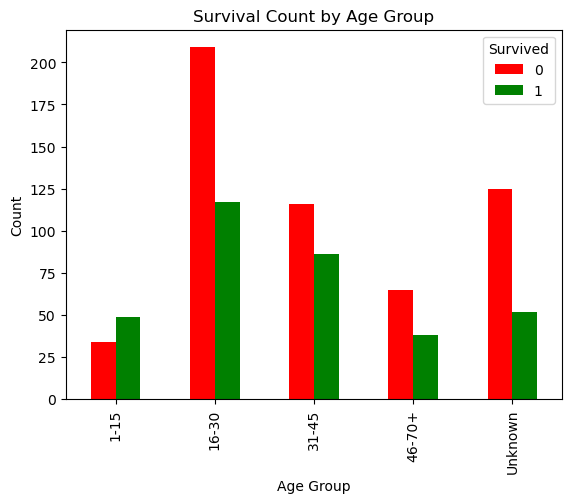

In [51]:
# for the age, instead of fill it with mean, ill use category it into many cols
# first let plot the age distribution
# bins = [float('-inf'),1, 10, 20, 30,40,50,60,70, float('inf')]
bins = [float('-inf'), 15, 30,45,float('inf')]
# labels = ['1-', '1-10', '11-20','21-30','31-40','41-50', '51-60','61-70','71+']
labels = ['1-15', '16-30','31-45',"46-70+"]
selected_rawdata_copy.loc[:, "Agegroup"]= pd.cut(selected_rawdata_copy["Age"],bins=bins,labels=labels,right=True, include_lowest=True)
selected_rawdata_copy.loc[:, "Agegroup"] = selected_rawdata_copy["Agegroup"].cat.add_categories("Unknown").fillna('Unknown')
grouped_age= selected_rawdata_copy.groupby(['Agegroup', 'Survived']).size().unstack(fill_value=0)
grouped_age.plot(kind='bar', stacked=False, color=['red', 'green'])

# Adding labels and title
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Survival Count by Age Group')
plt.show()

In [52]:
selected_rawdata_copy['Embarked'].fillna(selected_rawdata_copy['Embarked'].mode()[0], inplace=True)
selected_rawdata_copy['Embarked'].value_counts()


Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [53]:
selected_rawdata_copy['Sex'] = selected_rawdata_copy['Sex'].map({'female': 0, 'male': 1})
selected_rawdata_copy['Sex'].value_counts()


Sex
1    577
0    314
Name: count, dtype: int64

In [54]:
selected_rawdata_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    891 non-null    int64   
 1   Sex       891 non-null    int64   
 2   Age       714 non-null    float64 
 3   SibSp     891 non-null    int64   
 4   Parch     891 non-null    int64   
 5   Fare      891 non-null    float64 
 6   Embarked  891 non-null    object  
 7   Survived  891 non-null    int64   
 8   Agegroup  891 non-null    category
dtypes: category(1), float64(2), int64(5), object(1)
memory usage: 56.9+ KB


In [55]:
selected_rawdata_copy_dummies = pd.get_dummies(selected_rawdata_copy, columns=['Agegroup','Embarked'], drop_first=True) 


In [56]:
selected_rawdata_copy_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pclass            891 non-null    int64  
 1   Sex               891 non-null    int64  
 2   Age               714 non-null    float64
 3   SibSp             891 non-null    int64  
 4   Parch             891 non-null    int64  
 5   Fare              891 non-null    float64
 6   Survived          891 non-null    int64  
 7   Agegroup_16-30    891 non-null    bool   
 8   Agegroup_31-45    891 non-null    bool   
 9   Agegroup_46-70+   891 non-null    bool   
 10  Agegroup_Unknown  891 non-null    bool   
 11  Embarked_Q        891 non-null    bool   
 12  Embarked_S        891 non-null    bool   
dtypes: bool(6), float64(2), int64(5)
memory usage: 54.1 KB


In [57]:
full_data = selected_rawdata_copy_dummies.drop(["Age"], axis=1)
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pclass            891 non-null    int64  
 1   Sex               891 non-null    int64  
 2   SibSp             891 non-null    int64  
 3   Parch             891 non-null    int64  
 4   Fare              891 non-null    float64
 5   Survived          891 non-null    int64  
 6   Agegroup_16-30    891 non-null    bool   
 7   Agegroup_31-45    891 non-null    bool   
 8   Agegroup_46-70+   891 non-null    bool   
 9   Agegroup_Unknown  891 non-null    bool   
 10  Embarked_Q        891 non-null    bool   
 11  Embarked_S        891 non-null    bool   
dtypes: bool(6), float64(1), int64(5)
memory usage: 47.1 KB


In [58]:
from sklearn.model_selection import train_test_split
X = full_data.drop('Survived', axis=1)
y = full_data['Survived']
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_X = std_scaler.fit_transform(X)
X_train, X_val, y_train,y_val = train_test_split(scaled_X, y, test_size=0.2, random_state=42)
print(X_val.shape, X_train.shape, y_val.shape, y_train.shape)

(179, 11) (712, 11) (179,) (712,)


In [59]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.linear_model import SGDClassifier

# now let choose model
kf = KFold(n_splits=15, shuffle=True, random_state=42)
sgd_cls = SGDClassifier(alpha=0.001)

scores_sgd = cross_val_score(sgd_cls, X_train, y_train, cv=kf)
print("Cross-validation scores for SGD-SVM:", np.mean(scores_sgd))

Cross-validation scores for SGD-SVM: 0.8049054373522458


In [60]:
from sklearn.linear_model import LogisticRegression 
log_reg = LogisticRegression(C=0.01)
scores_logreg = cross_val_score(log_reg, X, y, cv=kf)
print("Cross-validation scores for Logistic Regression:", np.mean(scores_logreg))

Cross-validation scores for Logistic Regression: 0.7183239171374765


In [61]:
from sklearn.svm import SVC 
svm_rbf_classifier = SVC(kernel='rbf')
svm_poly_classifier = SVC(kernel='poly')
scores_svc_rbf = cross_val_score(svm_rbf_classifier, X, y, cv=kf)
scores_svc_poly = cross_val_score(svm_poly_classifier, X, y, cv=kf)
print("Cross-validation scores for SVC RBF:", np.mean(scores_svc_rbf))
print("Cross-validation scores for SVC Poly:", np.mean(scores_svc_poly))


Cross-validation scores for SVC RBF: 0.6767043314500943
Cross-validation scores for SVC Poly: 0.6308851224105462


In [62]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=10,n_estimators=10,bootstrap=False)
scores_rfc = cross_val_score(rfc, X, y, cv=kf)
print("Cross-validation scores for RFC:", np.mean(scores_rfc))
gbc = GradientBoostingClassifier(max_depth=5,n_estimators=16)
scores_gbc = cross_val_score(gbc, X, y, cv=kf)
print("Cross-validation scores for GBC:", np.mean(scores_gbc))


Cross-validation scores for RFC: 0.81045197740113
Cross-validation scores for GBC: 0.8183050847457627


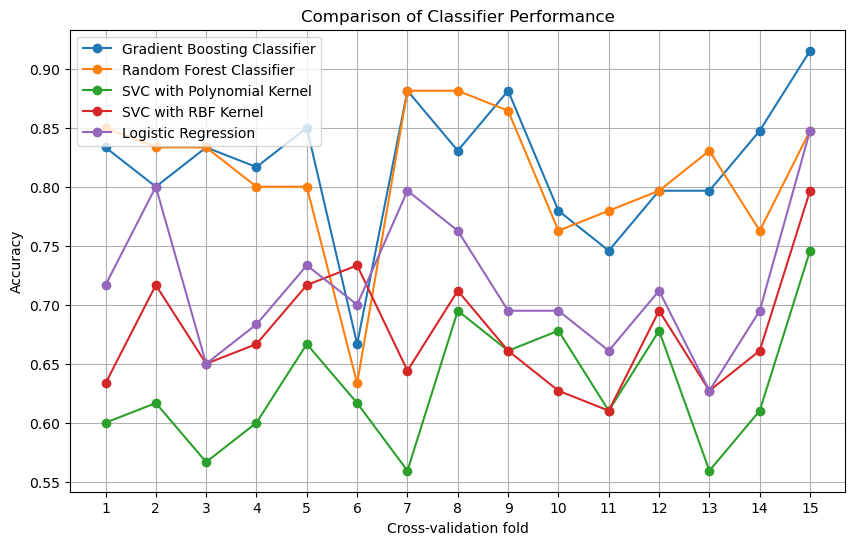

In [63]:
import matplotlib.pyplot as plt

# Scores for each classifier
scores = {
    'Gradient Boosting Classifier': scores_gbc,
    'Random Forest Classifier': scores_rfc,
    'SVC with Polynomial Kernel': scores_svc_poly,
    'SVC with RBF Kernel': scores_svc_rbf,
    'Logistic Regression': scores_logreg
}

# Plotting
plt.figure(figsize=(10, 6))
for classifier, score in scores.items():
    plt.plot(range(1, 16), score, marker='o', label=classifier)

plt.title('Comparison of Classifier Performance')
plt.xlabel('Cross-validation fold')
plt.ylabel('Accuracy')
plt.xticks(range(1, 16))
plt.legend()
plt.grid(True)
plt.show()


As we can see, with this kind of data (change Age to Group Age), only the GB and RF are still good

In [67]:
# now let see the score on val set
from sklearn.metrics import accuracy_score
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_val)
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_val)

print("rfc on val: ",accuracy_score(y_val, y_pred))
print("gbc on val: ",accuracy_score(y_val, y_pred_gbc))

rfc on val:  0.8156424581005587
gbc on val:  0.8044692737430168


In [68]:
# Now let try to fine tune the 2 model
# first use searchCV to find some relative good hyperparameter
from sklearn.model_selection import GridSearchCV
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [ 200, 300,400],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best Score: 0.8117403723037526


In [71]:
rfc = RandomForestClassifier(max_depth=10,n_estimators=400,bootstrap=False,min_samples_leaf=1,min_samples_split=2)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_val)
print("rfc on val: ",accuracy_score(y_val, y_pred))

rfc on val:  0.8212290502793296


Epoch: 150, Train Accuracy: 0.8188202247191011, Validation Accuracy: 0.7988826815642458
Epoch: 151, Train Accuracy: 0.824438202247191, Validation Accuracy: 0.7988826815642458
Epoch: 152, Train Accuracy: 0.827247191011236, Validation Accuracy: 0.7932960893854749
Epoch: 153, Train Accuracy: 0.8258426966292135, Validation Accuracy: 0.8044692737430168
Epoch: 154, Train Accuracy: 0.8216292134831461, Validation Accuracy: 0.8044692737430168
Epoch: 155, Train Accuracy: 0.824438202247191, Validation Accuracy: 0.7988826815642458
Epoch: 156, Train Accuracy: 0.8286516853932584, Validation Accuracy: 0.8044692737430168
Epoch: 157, Train Accuracy: 0.8216292134831461, Validation Accuracy: 0.7932960893854749
Epoch: 158, Train Accuracy: 0.824438202247191, Validation Accuracy: 0.7988826815642458
Epoch: 159, Train Accuracy: 0.8188202247191011, Validation Accuracy: 0.7932960893854749
Epoch: 160, Train Accuracy: 0.8230337078651685, Validation Accuracy: 0.7988826815642458
Epoch: 161, Train Accuracy: 0.820224

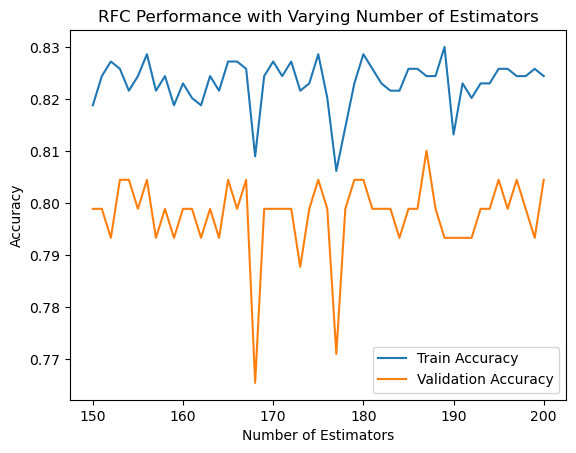

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

n_estimators_range = range(150, 201, 1)
train_scores = []
val_scores = []
for n_estimators in n_estimators_range:
    rfc = RandomForestClassifier(max_depth=3, n_estimators=n_estimators,max_features='sqrt', bootstrap=True, min_samples_leaf=2, min_samples_split=3)
    rfc.fit(X_train, y_train)
    y_train_pred = rfc.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_scores.append(train_accuracy)
    
    y_val_pred = rfc.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_scores.append(val_accuracy)
    
    print(f"Epoch: {n_estimators}, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")

# Plotting
import matplotlib.pyplot as plt

plt.plot(n_estimators_range, train_scores, label='Train Accuracy')
plt.plot(n_estimators_range, val_scores, label='Validation Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('RFC Performance with Varying Number of Estimators')
plt.legend()
plt.show()


max_depth: 2, Train Accuracy: 0.8047752808988764, Validation Accuracy: 0.7653631284916201
max_depth: 3, Train Accuracy: 0.8188202247191011, Validation Accuracy: 0.7988826815642458
max_depth: 4, Train Accuracy: 0.8342696629213483, Validation Accuracy: 0.8100558659217877
max_depth: 5, Train Accuracy: 0.8370786516853933, Validation Accuracy: 0.8044692737430168
max_depth: 6, Train Accuracy: 0.8553370786516854, Validation Accuracy: 0.8100558659217877
max_depth: 7, Train Accuracy: 0.8623595505617978, Validation Accuracy: 0.8100558659217877
max_depth: 8, Train Accuracy: 0.875, Validation Accuracy: 0.7988826815642458
max_depth: 9, Train Accuracy: 0.8820224719101124, Validation Accuracy: 0.8324022346368715
max_depth: 10, Train Accuracy: 0.8862359550561798, Validation Accuracy: 0.8324022346368715
max_depth: 11, Train Accuracy: 0.8918539325842697, Validation Accuracy: 0.8435754189944135
max_depth: 12, Train Accuracy: 0.8932584269662921, Validation Accuracy: 0.8324022346368715
max_depth: 13, Train

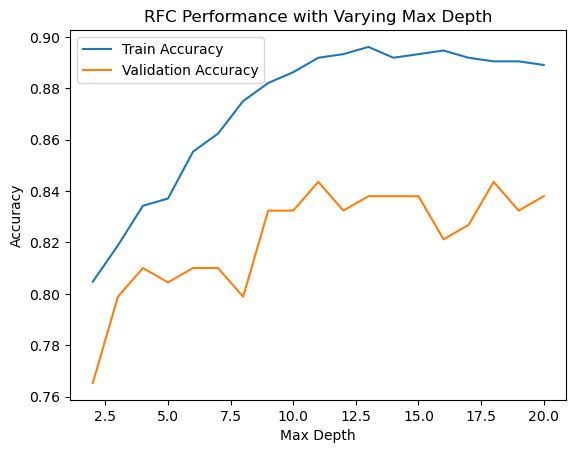

In [85]:
max_depth_range = range(2, 21)  # Vary max_depth from 2 to 10
train_scores = []
val_scores = []

for max_depth in max_depth_range:
    rfc = RandomForestClassifier(max_depth=max_depth, n_estimators=180,bootstrap=True, min_samples_leaf=2, min_samples_split=3)
    rfc.fit(X_train, y_train)
    
    y_train_pred = rfc.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_scores.append(train_accuracy)
    
    y_val_pred = rfc.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_scores.append(val_accuracy)
    
    print(f"max_depth: {max_depth}, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")

# Plotting
plt.plot(max_depth_range, train_scores, label='Train Accuracy')
plt.plot(max_depth_range, val_scores, label='Validation Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('RFC Performance with Varying Max Depth')
plt.legend()
plt.show()

min_samples_leaf: 1, Train Accuracy: 0.8412921348314607, Validation Accuracy: 0.8100558659217877
min_samples_leaf: 2, Train Accuracy: 0.8398876404494382, Validation Accuracy: 0.8100558659217877
min_samples_leaf: 3, Train Accuracy: 0.8384831460674157, Validation Accuracy: 0.8044692737430168
min_samples_leaf: 4, Train Accuracy: 0.8286516853932584, Validation Accuracy: 0.8044692737430168
min_samples_leaf: 5, Train Accuracy: 0.8370786516853933, Validation Accuracy: 0.8100558659217877
min_samples_leaf: 6, Train Accuracy: 0.827247191011236, Validation Accuracy: 0.7932960893854749
min_samples_leaf: 7, Train Accuracy: 0.8328651685393258, Validation Accuracy: 0.7988826815642458
min_samples_leaf: 8, Train Accuracy: 0.8286516853932584, Validation Accuracy: 0.7988826815642458
min_samples_leaf: 9, Train Accuracy: 0.8258426966292135, Validation Accuracy: 0.7932960893854749
min_samples_leaf: 10, Train Accuracy: 0.8314606741573034, Validation Accuracy: 0.7988826815642458
min_samples_leaf: 11, Train Ac

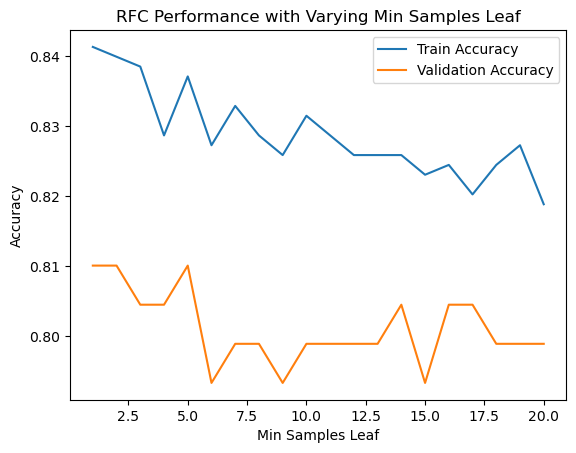

In [86]:
min_samples_leaf_range = range(1, 21)  # Vary min_samples_leaf from 1 to 10
train_scores = []
val_scores = []

for min_samples_leaf in min_samples_leaf_range:
    rfc = RandomForestClassifier(max_depth=5, n_estimators=180, bootstrap=True, min_samples_leaf=min_samples_leaf, min_samples_split=3)
    rfc.fit(X_train, y_train)
    
    y_train_pred = rfc.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_scores.append(train_accuracy)
    
    y_val_pred = rfc.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_scores.append(val_accuracy)
    
    print(f"min_samples_leaf: {min_samples_leaf}, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")

# Plotting
plt.plot(min_samples_leaf_range, train_scores, label='Train Accuracy')
plt.plot(min_samples_leaf_range, val_scores, label='Validation Accuracy')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Accuracy')
plt.title('RFC Performance with Varying Min Samples Leaf')
plt.legend()
plt.show()

min_samples_split: 2, Train Accuracy: 0.8426966292134831, Validation Accuracy: 0.8100558659217877
min_samples_split: 3, Train Accuracy: 0.8342696629213483, Validation Accuracy: 0.8100558659217877
min_samples_split: 4, Train Accuracy: 0.8398876404494382, Validation Accuracy: 0.8044692737430168
min_samples_split: 5, Train Accuracy: 0.8412921348314607, Validation Accuracy: 0.8100558659217877
min_samples_split: 6, Train Accuracy: 0.8412921348314607, Validation Accuracy: 0.8044692737430168
min_samples_split: 7, Train Accuracy: 0.8328651685393258, Validation Accuracy: 0.8044692737430168
min_samples_split: 8, Train Accuracy: 0.8398876404494382, Validation Accuracy: 0.8100558659217877
min_samples_split: 9, Train Accuracy: 0.8412921348314607, Validation Accuracy: 0.8100558659217877
min_samples_split: 10, Train Accuracy: 0.8412921348314607, Validation Accuracy: 0.8100558659217877
min_samples_split: 11, Train Accuracy: 0.8356741573033708, Validation Accuracy: 0.8100558659217877
min_samples_split:

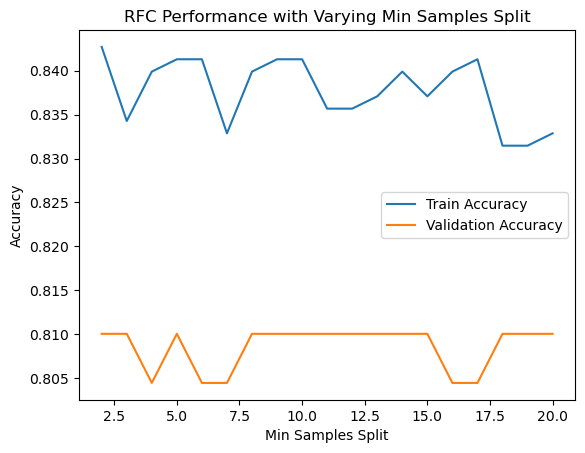

In [88]:
min_samples_split_range = range(2, 21)  # Vary min_samples_split from 2 to 10
train_scores = []
val_scores = []

for min_samples_split in min_samples_split_range:
    rfc = RandomForestClassifier(max_depth=5, n_estimators=180, bootstrap=True, min_samples_leaf=2, min_samples_split=min_samples_split)
    rfc.fit(X_train, y_train)
    
    y_train_pred = rfc.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_scores.append(train_accuracy)
    
    y_val_pred = rfc.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_scores.append(val_accuracy)
    
    print(f"min_samples_split: {min_samples_split}, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")

# Plotting
plt.plot(min_samples_split_range, train_scores, label='Train Accuracy')
plt.plot(min_samples_split_range, val_scores, label='Validation Accuracy')
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')
plt.title('RFC Performance with Varying Min Samples Split')
plt.legend()
plt.show()

In [92]:
# final rfc 
rfc = RandomForestClassifier(max_depth=5, n_estimators=180, bootstrap=True, min_samples_leaf=2, min_samples_split=10)
rfc.fit(X_train, y_train)
y_train_pred = rfc.predict(X_train)
y_val_pred = rfc.predict(X_val)
print("rfc on val: ",accuracy_score(y_val, y_pred))
print("rfc on train: ",accuracy_score(y_train, y_train_pred))
scores_rfc = cross_val_score(rfc, X, y, cv=kf)
print("Cross-validation scores for RFC:", np.mean(scores_rfc))


rfc on val:  0.8212290502793296
rfc on train:  0.8398876404494382
Cross-validation scores for RFC: 0.8104331450094161


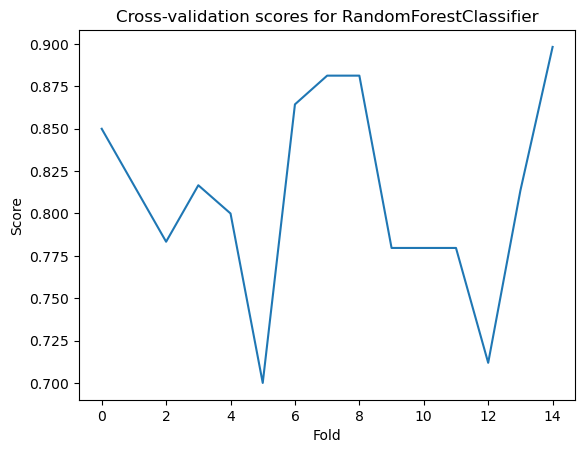

In [93]:
import matplotlib.pyplot as plt

plt.plot(scores_rfc)
plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Cross-validation scores for RandomForestClassifier')
plt.show()


In [94]:
param_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best Score: 0.8062050625430907


Learning Rate: 0.4, Train Accuracy: 0.949438202247191, Validation Accuracy: 0.8212290502793296
Learning Rate: 0.41000000000000003, Train Accuracy: 0.9480337078651685, Validation Accuracy: 0.8212290502793296
Learning Rate: 0.42000000000000004, Train Accuracy: 0.9508426966292135, Validation Accuracy: 0.7932960893854749
Learning Rate: 0.43000000000000005, Train Accuracy: 0.9508426966292135, Validation Accuracy: 0.7988826815642458
Learning Rate: 0.44000000000000006, Train Accuracy: 0.9508426966292135, Validation Accuracy: 0.8379888268156425
Learning Rate: 0.45000000000000007, Train Accuracy: 0.9508426966292135, Validation Accuracy: 0.7988826815642458
Learning Rate: 0.4600000000000001, Train Accuracy: 0.9508426966292135, Validation Accuracy: 0.8156424581005587
Learning Rate: 0.4700000000000001, Train Accuracy: 0.949438202247191, Validation Accuracy: 0.7932960893854749
Learning Rate: 0.4800000000000001, Train Accuracy: 0.949438202247191, Validation Accuracy: 0.7877094972067039
Learning Rate:

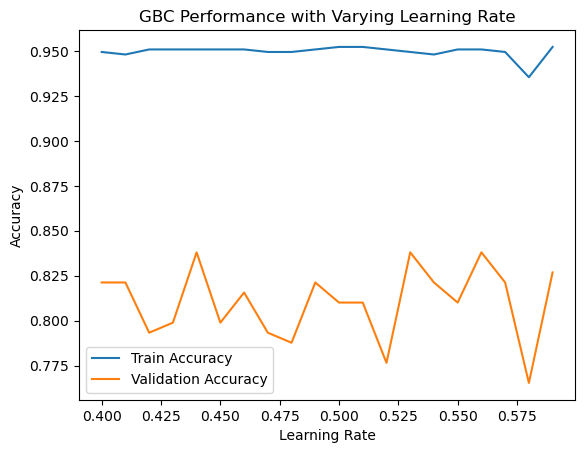

In [107]:
learning_rate_range = np.arange(0.4, 0.6, 0.01)
train_scores = []
val_scores = []

for learning_rate in learning_rate_range:
    gbc = GradientBoostingClassifier(n_estimators=50, max_depth=5, min_samples_leaf=2, min_samples_split=5, subsample=0.8, learning_rate=learning_rate)
    gbc.fit(X_train, y_train)
    
    y_train_pred = gbc.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_scores.append(train_accuracy)
    
    y_val_pred = gbc.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_scores.append(val_accuracy)
    
    print(f"Learning Rate: {learning_rate}, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")

# Plotting
plt.plot(learning_rate_range, train_scores, label='Train Accuracy')
plt.plot(learning_rate_range, val_scores, label='Validation Accuracy')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('GBC Performance with Varying Learning Rate')
plt.legend()
plt.show()


Subsample: 0.5, Train Accuracy: 0.8595505617977528, Validation Accuracy: 0.7988826815642458
Subsample: 0.52, Train Accuracy: 0.8679775280898876, Validation Accuracy: 0.8044692737430168
Subsample: 0.54, Train Accuracy: 0.8497191011235955, Validation Accuracy: 0.8156424581005587
Subsample: 0.56, Train Accuracy: 0.8581460674157303, Validation Accuracy: 0.8268156424581006
Subsample: 0.5800000000000001, Train Accuracy: 0.8623595505617978, Validation Accuracy: 0.8324022346368715
Subsample: 0.6000000000000001, Train Accuracy: 0.8707865168539326, Validation Accuracy: 0.8435754189944135
Subsample: 0.6200000000000001, Train Accuracy: 0.8581460674157303, Validation Accuracy: 0.8212290502793296
Subsample: 0.6400000000000001, Train Accuracy: 0.8764044943820225, Validation Accuracy: 0.8435754189944135
Subsample: 0.6600000000000001, Train Accuracy: 0.8764044943820225, Validation Accuracy: 0.8212290502793296
Subsample: 0.6800000000000002, Train Accuracy: 0.8735955056179775, Validation Accuracy: 0.8156

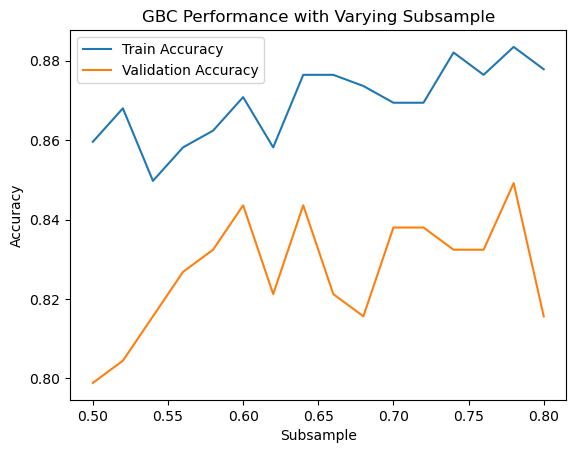

In [113]:
subsample_range = np.arange(0.5, 0.8, 0.02)
train_scores = []
val_scores = []

for subsample in subsample_range:
    gbc = GradientBoostingClassifier(n_estimators=20, max_depth=5, min_samples_leaf=30, min_samples_split=30, subsample=subsample, learning_rate=0.5)
    gbc.fit(X_train, y_train)
    
    y_train_pred = gbc.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_scores.append(train_accuracy)
    
    y_val_pred = gbc.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_scores.append(val_accuracy)
    
    print(f"Subsample: {subsample}, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")

# Plotting
plt.plot(subsample_range, train_scores, label='Train Accuracy')
plt.plot(subsample_range, val_scores, label='Validation Accuracy')
plt.xlabel('Subsample')
plt.ylabel('Accuracy')
plt.title('GBC Performance with Varying Subsample')
plt.legend()
plt.show()


n_estimators: 1, Train Accuracy: 0.7921348314606742, Validation Accuracy: 0.7653631284916201
n_estimators: 2, Train Accuracy: 0.8089887640449438, Validation Accuracy: 0.7877094972067039
n_estimators: 3, Train Accuracy: 0.8117977528089888, Validation Accuracy: 0.7877094972067039
n_estimators: 4, Train Accuracy: 0.8174157303370787, Validation Accuracy: 0.7932960893854749
n_estimators: 5, Train Accuracy: 0.824438202247191, Validation Accuracy: 0.7988826815642458
n_estimators: 6, Train Accuracy: 0.8314606741573034, Validation Accuracy: 0.8044692737430168
n_estimators: 7, Train Accuracy: 0.8286516853932584, Validation Accuracy: 0.7988826815642458
n_estimators: 8, Train Accuracy: 0.8469101123595506, Validation Accuracy: 0.8268156424581006
n_estimators: 9, Train Accuracy: 0.8539325842696629, Validation Accuracy: 0.8324022346368715
n_estimators: 10, Train Accuracy: 0.8581460674157303, Validation Accuracy: 0.8324022346368715
n_estimators: 11, Train Accuracy: 0.8553370786516854, Validation Accur

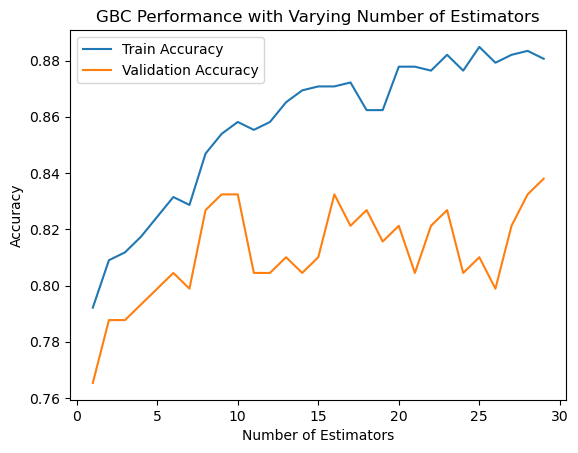

In [120]:
n_estimators_range = range(1, 30, 1)
train_scores = []
val_scores = []

for n_estimators in n_estimators_range:
    gbc = GradientBoostingClassifier(n_estimators=n_estimators, max_depth=5, min_samples_leaf=30, min_samples_split=30, subsample=0.75, learning_rate=0.5,random_state=42)
    gbc.fit(X_train, y_train)
    
    y_train_pred = gbc.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_scores.append(train_accuracy)
    
    y_val_pred = gbc.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_scores.append(val_accuracy)
    
    print(f"n_estimators: {n_estimators}, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")

# Plotting
plt.plot(n_estimators_range, train_scores, label='Train Accuracy')
plt.plot(n_estimators_range, val_scores, label='Validation Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('GBC Performance with Varying Number of Estimators')
plt.legend()
plt.show()

Max Depth: 1, Train Accuracy: 0.8061797752808989, Validation Accuracy: 0.7932960893854749
Max Depth: 2, Train Accuracy: 0.8174157303370787, Validation Accuracy: 0.8156424581005587
Max Depth: 3, Train Accuracy: 0.8384831460674157, Validation Accuracy: 0.8156424581005587
Max Depth: 4, Train Accuracy: 0.848314606741573, Validation Accuracy: 0.8324022346368715
Max Depth: 5, Train Accuracy: 0.8581460674157303, Validation Accuracy: 0.8324022346368715
Max Depth: 6, Train Accuracy: 0.8525280898876404, Validation Accuracy: 0.8044692737430168
Max Depth: 7, Train Accuracy: 0.848314606741573, Validation Accuracy: 0.8156424581005587
Max Depth: 8, Train Accuracy: 0.8539325842696629, Validation Accuracy: 0.7988826815642458
Max Depth: 9, Train Accuracy: 0.8567415730337079, Validation Accuracy: 0.7877094972067039
Max Depth: 10, Train Accuracy: 0.8553370786516854, Validation Accuracy: 0.8044692737430168
Max Depth: 11, Train Accuracy: 0.8553370786516854, Validation Accuracy: 0.8044692737430168
Max Depth:

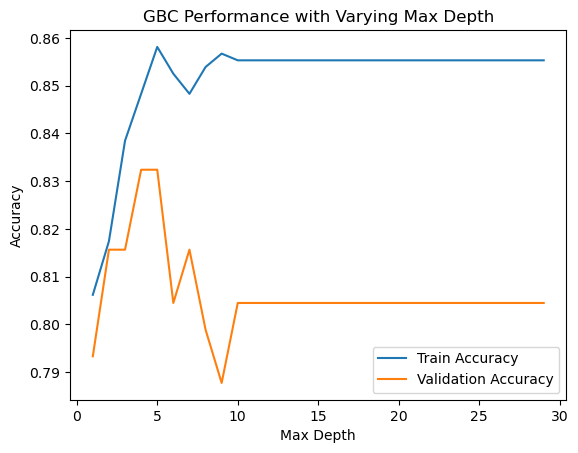

In [119]:
max_depth_range = range(1, 30, 1)
train_scores = []
val_scores = []

for max_depth in max_depth_range:
    gbc = GradientBoostingClassifier(n_estimators=10, max_depth=max_depth, min_samples_leaf=30, min_samples_split=30, subsample=0.75, learning_rate=0.5,random_state=42)
    gbc.fit(X_train, y_train)
    
    y_train_pred = gbc.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_scores.append(train_accuracy)
    
    y_val_pred = gbc.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_scores.append(val_accuracy)
    
    print(f"Max Depth: {max_depth}, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")

# Plotting
plt.plot(max_depth_range, train_scores, label='Train Accuracy')
plt.plot(max_depth_range, val_scores, label='Validation Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('GBC Performance with Varying Max Depth')
plt.legend()
plt.show()


Min Samples Leaf: 1, Train Accuracy: 0.8946629213483146, Validation Accuracy: 0.8156424581005587
Min Samples Leaf: 6, Train Accuracy: 0.8848314606741573, Validation Accuracy: 0.8435754189944135
Min Samples Leaf: 11, Train Accuracy: 0.8792134831460674, Validation Accuracy: 0.8100558659217877
Min Samples Leaf: 16, Train Accuracy: 0.8792134831460674, Validation Accuracy: 0.8324022346368715
Min Samples Leaf: 21, Train Accuracy: 0.8623595505617978, Validation Accuracy: 0.8100558659217877
Min Samples Leaf: 26, Train Accuracy: 0.8497191011235955, Validation Accuracy: 0.8044692737430168
Min Samples Leaf: 31, Train Accuracy: 0.8455056179775281, Validation Accuracy: 0.7932960893854749
Min Samples Leaf: 36, Train Accuracy: 0.8328651685393258, Validation Accuracy: 0.7988826815642458
Min Samples Leaf: 41, Train Accuracy: 0.8412921348314607, Validation Accuracy: 0.8100558659217877
Min Samples Leaf: 46, Train Accuracy: 0.8384831460674157, Validation Accuracy: 0.8100558659217877
Min Samples Leaf: 51, 

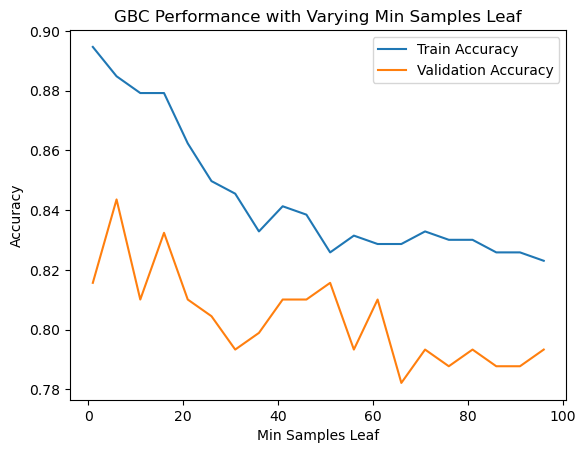

In [125]:
min_samples_leaf_range = range(1, 100, 5)
train_scores = []
val_scores = []

for min_samples_leaf in min_samples_leaf_range:
    gbc = GradientBoostingClassifier(n_estimators=10, max_depth=5, min_samples_leaf=min_samples_leaf, min_samples_split=30, subsample=0.75, learning_rate=0.5)
    gbc.fit(X_train, y_train)
    
    y_train_pred = gbc.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_scores.append(train_accuracy)
    
    y_val_pred = gbc.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_scores.append(val_accuracy)
    
    print(f"Min Samples Leaf: {min_samples_leaf}, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")

# Plotting
plt.plot(min_samples_leaf_range, train_scores, label='Train Accuracy')
plt.plot(min_samples_leaf_range, val_scores, label='Validation Accuracy')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Accuracy')
plt.title('GBC Performance with Varying Min Samples Leaf')
plt.legend()
plt.show()


Min Samples Split: 2, Train Accuracy: 0.8286516853932584, Validation Accuracy: 0.8100558659217877
Min Samples Split: 7, Train Accuracy: 0.8300561797752809, Validation Accuracy: 0.7821229050279329
Min Samples Split: 12, Train Accuracy: 0.8230337078651685, Validation Accuracy: 0.7932960893854749
Min Samples Split: 17, Train Accuracy: 0.8258426966292135, Validation Accuracy: 0.8156424581005587
Min Samples Split: 22, Train Accuracy: 0.8455056179775281, Validation Accuracy: 0.8156424581005587
Min Samples Split: 27, Train Accuracy: 0.8342696629213483, Validation Accuracy: 0.7932960893854749
Min Samples Split: 32, Train Accuracy: 0.8370786516853933, Validation Accuracy: 0.8044692737430168
Min Samples Split: 37, Train Accuracy: 0.8328651685393258, Validation Accuracy: 0.8044692737430168
Min Samples Split: 42, Train Accuracy: 0.827247191011236, Validation Accuracy: 0.7988826815642458
Min Samples Split: 47, Train Accuracy: 0.8314606741573034, Validation Accuracy: 0.7932960893854749
Min Samples S

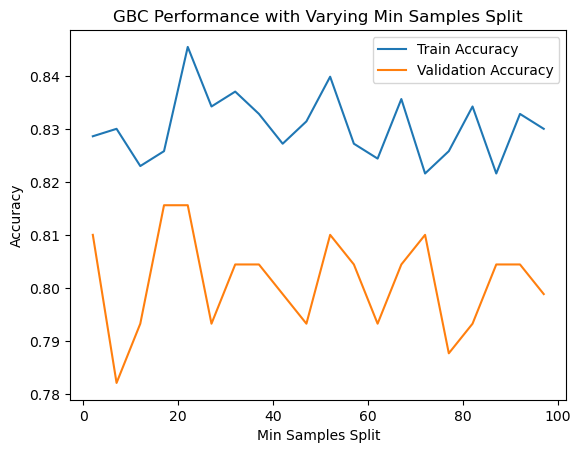

In [130]:
min_samples_split_range = range(2, 101, 5)
train_scores = []
val_scores = []

for min_samples_split in min_samples_split_range:
    gbc = GradientBoostingClassifier(n_estimators=10, max_depth=5, min_samples_leaf=60, min_samples_split=min_samples_split, subsample=0.75, learning_rate=0.5)
    gbc.fit(X_train, y_train)
    
    y_train_pred = gbc.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_scores.append(train_accuracy)
    
    y_val_pred = gbc.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_scores.append(val_accuracy)
    
    print(f"Min Samples Split: {min_samples_split}, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")

# Plotting
plt.plot(min_samples_split_range, train_scores, label='Train Accuracy')
plt.plot(min_samples_split_range, val_scores, label='Validation Accuracy')
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')
plt.title('GBC Performance with Varying Min Samples Split')
plt.legend()
plt.show()


In [131]:
# final GBC
gbc = GradientBoostingClassifier(n_estimators=10, max_depth=5, min_samples_leaf=60, min_samples_split=20, subsample=0.75, learning_rate=0.5)
gbc.fit(X_train,y_train)
y_train_pred = gbc.predict(X_train)
y_val_pred = gbc.predict(X_val)
print("gbc on val: ",accuracy_score(y_val, y_pred))
print("gbc on train: ",accuracy_score(y_train, y_train_pred))
scores_gbc = cross_val_score(gbc, X, y, cv=kf)
print("Cross-validation scores for GBC:", np.mean(scores_rfc))



gbc on val:  0.8212290502793296
gbc on train:  0.827247191011236
Cross-validation scores for GBC: 0.8104331450094161


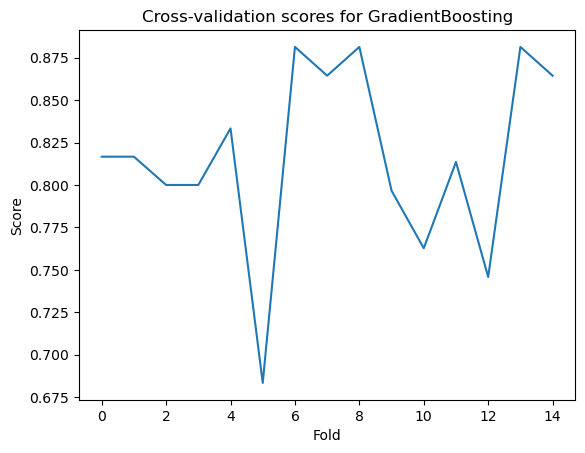

In [132]:
import matplotlib.pyplot as plt

plt.plot(scores_gbc)
plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Cross-validation scores for GradientBoosting')
plt.show()


In [136]:
test_raw = pd.read_csv("test.csv")
test_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [138]:
selected_testdata = test_raw[ [ 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
selected_testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [139]:
selected_testdata_copy = selected_testdata.copy()
bins = [float('-inf'), 15, 30,45,float('inf')]
# labels = ['1-', '1-10', '11-20','21-30','31-40','41-50', '51-60','61-70','71+']
labels = ['1-15', '16-30','31-45',"46-70+"]
selected_testdata_copy.loc[:, "Agegroup"]= pd.cut(selected_testdata_copy["Age"],bins=bins,labels=labels,right=True, include_lowest=True)
selected_testdata_copy.loc[:, "Agegroup"] = selected_testdata_copy["Agegroup"].cat.add_categories("Unknown").fillna('Unknown')
selected_testdata_copy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    418 non-null    int64   
 1   Sex       418 non-null    object  
 2   Age       332 non-null    float64 
 3   SibSp     418 non-null    int64   
 4   Parch     418 non-null    int64   
 5   Fare      417 non-null    float64 
 6   Embarked  418 non-null    object  
 7   Agegroup  418 non-null    category
dtypes: category(1), float64(2), int64(3), object(2)
memory usage: 23.6+ KB


In [150]:
selected_testdata_copy['Sex'] = selected_testdata_copy['Sex'].map({'female': 0, 'male': 1})


In [151]:
selected_testdata_copy['Embarked'].fillna(selected_testdata_copy['Embarked'].mode()[0], inplace=True)


In [152]:
selected_testdata_copy_dummies = pd.get_dummies(selected_testdata_copy, columns=['Agegroup','Embarked'], drop_first=True) 


In [153]:
selected_testdata_copy_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pclass            418 non-null    int64  
 1   Sex               418 non-null    int64  
 2   Age               332 non-null    float64
 3   SibSp             418 non-null    int64  
 4   Parch             418 non-null    int64  
 5   Fare              417 non-null    float64
 6   Agegroup_16-30    418 non-null    bool   
 7   Agegroup_31-45    418 non-null    bool   
 8   Agegroup_46-70+   418 non-null    bool   
 9   Agegroup_Unknown  418 non-null    bool   
 10  Embarked_Q        418 non-null    bool   
 11  Embarked_S        418 non-null    bool   
dtypes: bool(6), float64(2), int64(4)
memory usage: 22.2 KB


In [154]:
full_test = selected_testdata_copy_dummies.drop(["Age"], axis=1)
full_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pclass            418 non-null    int64  
 1   Sex               418 non-null    int64  
 2   SibSp             418 non-null    int64  
 3   Parch             418 non-null    int64  
 4   Fare              417 non-null    float64
 5   Agegroup_16-30    418 non-null    bool   
 6   Agegroup_31-45    418 non-null    bool   
 7   Agegroup_46-70+   418 non-null    bool   
 8   Agegroup_Unknown  418 non-null    bool   
 9   Embarked_Q        418 non-null    bool   
 10  Embarked_S        418 non-null    bool   
dtypes: bool(6), float64(1), int64(4)
memory usage: 18.9 KB


In [155]:
full_test.fillna(full_test.median(), inplace=True) 
full_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pclass            418 non-null    int64  
 1   Sex               418 non-null    int64  
 2   SibSp             418 non-null    int64  
 3   Parch             418 non-null    int64  
 4   Fare              418 non-null    float64
 5   Agegroup_16-30    418 non-null    bool   
 6   Agegroup_31-45    418 non-null    bool   
 7   Agegroup_46-70+   418 non-null    bool   
 8   Agegroup_Unknown  418 non-null    bool   
 9   Embarked_Q        418 non-null    bool   
 10  Embarked_S        418 non-null    bool   
dtypes: bool(6), float64(1), int64(4)
memory usage: 18.9 KB


In [156]:
X_test = std_scaler.fit_transform(full_test)

In [157]:
y_test_pre = rfc.predict(X_test)

In [158]:
y_test_pre_pd = pd.DataFrame(y_test_pre,columns=["Survived"])
y_test_pre_pd.value_counts()

Survived
0           280
1           138
Name: count, dtype: int64

In [160]:
final_y_test_pre_pd = pd.concat([rawtestdata['PassengerId'],y_test_pre_pd],axis=1)
final_y_test_pre_pd.to_csv("predict_rfc_early_stop.csv",index=False)

In [161]:
y_test_pre = gbc.predict(X_test)
y_test_pre_pd = pd.DataFrame(y_test_pre,columns=["Survived"])
y_test_pre_pd.value_counts()
final_y_test_pre_pd = pd.concat([rawtestdata['PassengerId'],y_test_pre_pd],axis=1)
final_y_test_pre_pd.to_csv("predict_gbc_early_stop.csv",index=False)